# Tree Survival Prediction and Sterility Prediction

The analysis performed in this report displays the key factors that affect the trees survival and also expresses the importance of sterility of soil in regards to mortality of the subject by predicting the Sterility of Soil. Factors such as Light levels, type of soil, type of fungi found in the roots, Lignin and many more are used to classify the state of the tree, whether alive or dead, using multiple effective classification algorithms and thus claiming which method has a superior performance for this subject by comparing their results and observing the difference in performance.

The following methodologies are being used for the study of Tree Survivability -
Logistic Regression.
Random Forest Classifier.
Support Vector Machine.

For Soil Sterility Classification, KNN (K Nearest Neighbour) has been used. Feature selection has been done using Grid Search CV and by using Random Forest as the estimator. The data is in the format of a .csv and was procured and used by [1]. The data has 8 categorical data out of the total 24 features and the rest are numeric. The target variable for the Tree Survival Prediction is Event and Sterility for Sterility Prediction.

This study performs Exploratory Data Analysis  to have a better insight into the data and how the features relate to the target variable. Additionally, we will perform data cleaning to deal with the missing values in some features and to remove the NaN values in the dataset. We will also perform Feature engineering by using label encoder to convert categorical data into numeric data, followed by Feature Selection to scope the data and find the features which are useful for the prediction of the target variable. We will then apply machine learning algorithms mentioned before and give a thorough explanation on how the said algorithm works for our dataset and will finally compare the results of each of these methods and present the model that works the best.


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import make_scorer, roc_curve, auc, confusion_matrix, classification_report, f1_score

from plotly.express import bar, histogram, scatter

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/mnt/c/Users/ziyad/Documents/Datasets/TreeSurPred/Tree_Data.csv')
df.head(20)
df_main = df

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [3]:
print("Shape of data frame: " + f'{df.shape}')

Shape of data frame: (2783, 24)


In [4]:
print('------------- Columns and Data Types -------------')
for column in df.columns:
    print(f'{column}: {df[column].dtype}')

------------- Columns and Data Types -------------
No: int64
Plot: int64
Subplot: object
Species: object
Light_ISF: float64
Light_Cat: object
Core: int64
Soil: object
Adult: object
Sterile: object
Conspecific: object
Myco: object
SoilMyco: object
PlantDate: object
AMF: float64
EMF: float64
Phenolics: float64
Lignin: float64
NSC: float64
Census: int64
Time: float64
Event: float64
Harvest: object
Alive: object


In [5]:
# Check for missing values
missing_vals = df.isnull().sum()

# Print columns with missing values and counts
for col, vals in missing_vals.items():
    if vals > 0:
        print(f"{col} has {vals} missing values")

EMF has 1500 missing values
Event has 1 missing values
Harvest has 2079 missing values
Alive has 2292 missing values


### Performing EDA

In [6]:
#EDA

for column in ['Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil',
       'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate', 
               'Census', 'Time', ]:
    bar(data_frame=df[[column, 'Event']].groupby(by=[column, 'Event']).size().reset_index(), x=column, y=0, color='Event',
     color_continuous_scale='bluered').show()

In [7]:
for column in ['AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC',]:
    histogram(data_frame=df, x=column, color='Event').show()


In [8]:
scatter(data_frame=df, x='Lignin', y='Phenolics', color='Event', color_continuous_scale='bluered')

### Chi_2 Scores

In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

# Perform chi-square test for each categorical column
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Sterile'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"\nChi-square test for {column}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")

    # Check for significance (you may choose your significance level, e.g., 0.05)
    if p < 0.05:
        print("The groups are statistically significant.")
    else:
        print("The groups are not statistically significant.")


Chi-square test for Subplot:
Chi2 value: 2.7221971923551402
P-value: 0.605336014898842
The groups are not statistically significant.

Chi-square test for Species:
Chi2 value: 3.496670240897452
P-value: 0.32119423624492116
The groups are not statistically significant.

Chi-square test for Light_Cat:
Chi2 value: 0.41563099076693755
P-value: 0.8123569064851989
The groups are not statistically significant.

Chi-square test for Soil:
Chi2 value: 2783.0
P-value: 0.0
The groups are statistically significant.

Chi-square test for Adult:
Chi2 value: 191.73758893670617
P-value: 1.624275197838986e-23
The groups are statistically significant.

Chi-square test for Sterile:
Chi2 value: 2775.246973724918
P-value: 0.0
The groups are statistically significant.

Chi-square test for Conspecific:
Chi2 value: 2783.0
P-value: 0.0
The groups are statistically significant.

Chi-square test for Myco:
Chi2 value: 3.051287512550038
P-value: 0.0806731654540942
The groups are not statistically significant.

Chi-s

In [10]:
column_with_missing_value = 'Event'

# Find the index with the missing value
missing_index = df[df[column_with_missing_value].isnull()].index[0]

# Print values of other features for the same index
print("Values of other features at index", missing_index)
df.iloc[missing_index, :]

Values of other features at index 2781


No                     7771
Plot                     18
Subplot                   D
Species        Quercus alba
Light_ISF             0.161
Light_Cat              High
Core                   2017
Soil                Sterile
Adult                  1297
Sterile             Sterile
Conspecific      Sterilized
Myco                    EMF
SoilMyco            Sterile
PlantDate           5/17/18
AMF                   16.99
EMF                   22.51
Phenolics              4.28
Lignin                19.38
NSC                   21.36
Census                   33
Time                  115.5
Event                   NaN
Harvest                 NaN
Alive                   NaN
Name: 2781, dtype: object

In [27]:
df_main.dropna(subset=['Event'], inplace=True)

In [28]:
print("New Shape of data frame: " + f'{df_main.shape}')

New Shape of data frame: (2782, 24)


In [13]:
df.describe()

No         Plot    Light_ISF         Core          AMF  \
count  2782.000000  2782.000000  2782.000000  2782.000000  2782.000000   
mean   3913.127606     9.558591     0.085680  2016.648814    20.554349   
std    2252.733097     5.202133     0.025603     0.477427    12.311615   
min       3.000000     1.000000     0.032000  2016.000000     0.000000   
25%    1970.500000     5.000000     0.066000  2016.000000    13.400000   
50%    3931.500000    10.000000     0.082000  2017.000000    18.000000   
75%    5877.750000    14.000000     0.100000  2017.000000    24.447500   
max    7772.000000    18.000000     0.161000  2017.000000   100.000000   

               EMF    Phenolics       Lignin          NSC       Census  \
count  1282.000000  2782.000000  2782.000000  2782.000000  2782.000000   
mean     26.479844     1.932261    15.758490    14.217074    15.275701   
std      16.643013     1.969693     6.780478     4.296910     9.162042   
min       0.000000    -1.350000     2.230000     4.300000     4.000000   
25%      13.780000     0.170000    10.352500    11.602500     7.000000   
50%      27.730000     0.750000    14.040000    12.655000    13.000000   
75%      35.710000     3.780000    21.117500    17.270000    18.000000   
max      87.500000     6.100000    32.770000    29.450000    33.000000   

              Time        Event  
count  2782.000000  2782.000000  
mean     53.464953     0.570453  
std      32.067148     0.495100  
min      14.000000     0.000000  
25%      24.500000     0.000000  
50%      45.500000     1.000000  
75%      63.000000     1.000000  
max     115.500000     1.000000

In [29]:
df_EDA = df_main

In [30]:
f1_score_EDA = f1_score(y_true = df_EDA['Event'].values, y_pred=[int(value < 1.2) for value in df_EDA['Phenolics'].values])
print("the f1_score is :" + str(f1_score_EDA))
print("The Confusion Matrix: ")
confusion_matrix(y_true = df_EDA['Event'].values, y_pred=[int(value < 1.2) for value in df_EDA['Phenolics'].values])



the f1_score is :0.8245614035087718
The Confusion Matrix: 


array([[ 973,  222],
       [ 318, 1269]])

#### Proof of Classification

In [31]:
tsne = TSNE(random_state=2023, verbose=1, n_components=2)
columns = ['Phenolics', 'Lignin', 'Time',]
df_EDA[['t0', 't1',]] = tsne.fit_transform(X=df_EDA[columns])
scatter(data_frame=df_EDA, x='t0', y='t1', color='Event', color_continuous_scale='bluered', hover_name=df_EDA.index)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2782 samples in 0.001s...
[t-SNE] Computed neighbors for 2782 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2782
[t-SNE] Computed conditional probabilities for sample 2000 / 2782
[t-SNE] Computed conditional probabilities for sample 2782 / 2782
[t-SNE] Mean sigma: 0.374585
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.876431
[t-SNE] KL divergence after 1000 iterations: 0.252046


In [34]:
df.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             0
Harvest        2078
Alive          2291
t0                0
t1                0
dtype: int64

In [24]:
df_EDA.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             0
Harvest        2078
Alive          2291
t0                0
t1                0
dtype: int64

### Data Cleaning 

In [35]:
df_cleaned = df
df_cleaned = df_cleaned.drop(['Plot', 'Subplot', 'Time', 'Harvest', 'Alive', 'PlantDate', 'Census', 'No', 't0', 't1'], axis=1)
df_cleaned['EMF'].fillna(df_cleaned['EMF'].mean(), inplace=True)
df_cleaned.isnull().sum()

Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Event          0
dtype: int64

### Feature Engineering

In [36]:
lst=["Species","Light_Cat","Soil","Sterile","Conspecific","Myco","SoilMyco"]
le=LabelEncoder()
for i in lst:
    df_cleaned[i]=le.fit_transform(df_cleaned[i])

# Convert 'Adult' to string and then encode
df_cleaned['Adult'] = df_cleaned['Adult'].astype(str)
df_cleaned['Adult'] = le.fit_transform(df_cleaned['Adult'])
df_cleaned.head(10)

Species  Light_ISF  Light_Cat  Core  Soil  Adult  Sterile  Conspecific  \
0        0      0.106          2  2017     3     34        0            1   
1        2      0.106          2  2017     5     30        0            1   
2        3      0.106          2  2017     3     35        0            1   
3        0      0.080          2  2016     3     35        0            1   
4        0      0.060          1  2017     3     26        0            1   
5        1      0.106          2  2016     0      9        0            1   
6        2      0.108          2  2016     2     27        0            1   
7        3      0.108          2  2017     6     15        1            2   
8        3      0.108          2  2016     1      6        0            1   
9        0      0.108          2  2016     2     22        0            1   

   Myco  SoilMyco    AMF        EMF  Phenolics  Lignin    NSC  Event  
0     0         0  22.00  26.479844      -0.56   13.86  12.15    1.0  
1     1         1  15.82  31.070000       5.19   20.52  19.29    0.0  
2     1         0  24.45  28.190000       3.36   24.74  15.01    1.0  
3     0         0  22.23  26.479844      -0.71   14.29  12.36    1.0  
4     0         0  21.15  26.479844      -0.58   10.85  11.20    1.0  
5     0         0  35.29  26.479844       0.30   10.80  13.79    1.0  
6     1         1  24.00  20.000000       5.11   18.82  22.51    0.0  
7     1         2   4.00   0.000000       3.43   25.22  14.81    0.0  
8     1         0  28.74  36.180000       3.83   26.65  14.65    0.0  
9     0         1  14.16  26.479844      -0.05   13.30  12.16    1.0

In [37]:
df_cleaned.any().isnull()

Species        False
Light_ISF      False
Light_Cat      False
Core           False
Soil           False
Adult          False
Sterile        False
Conspecific    False
Myco           False
SoilMyco       False
AMF            False
EMF            False
Phenolics      False
Lignin         False
NSC            False
Event          False
dtype: bool

### Feature Selection

In [38]:
y = df_cleaned['Event']
X = df_cleaned.drop('Event', axis=1)

In [39]:
params = {
    "max_depth": range(1, 9),
    "min_samples_split": [5, 7, 9, 12, 15],
    "min_samples_leaf": [5, 7, 9, 10, 12]
}

s_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

estimator = RandomForestClassifier(random_state=42)
scoring = make_scorer(f1_score)

grid_search = GridSearchCV(
    estimator=estimator, 
    param_grid=params, 
    scoring=scoring, 
    cv=s_kfold, 
    n_jobs=-1
)

search_results = grid_search.fit(X, y)

best_params = search_results.best_params_
best_score = search_results.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best score: 0.8428030630027773


In [40]:
fi = pd.Series(search_results.best_estimator_.feature_importances_, index = X.columns)
print("F1 Scores: ")
fi

F1 Scores: 


Species        0.127561
Light_ISF      0.020670
Light_Cat      0.005425
Core           0.002345
Soil           0.015440
Adult          0.009589
Sterile        0.008304
Conspecific    0.008758
Myco           0.113989
SoilMyco       0.007810
AMF            0.105436
EMF            0.067454
Phenolics      0.242246
Lignin         0.195212
NSC            0.069761
dtype: float64

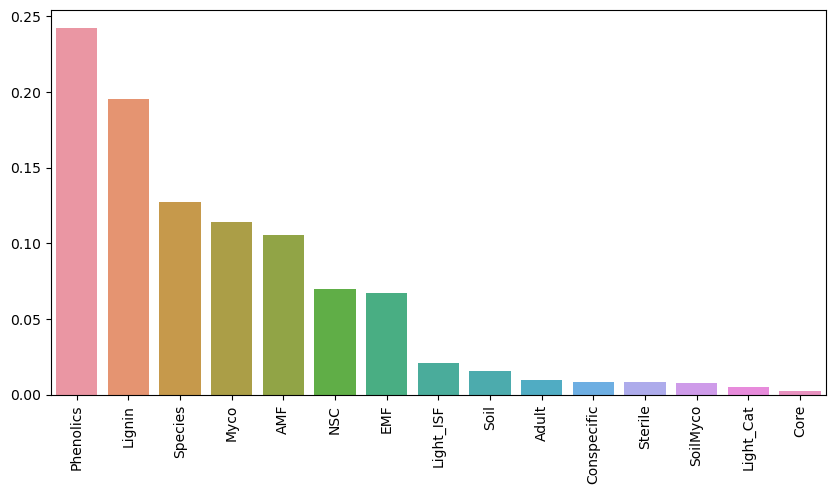

In [41]:
plt.figure(figsize=(10,5))

# Sort the feature importance values in descending order
sorted_fi = fi.sort_values(ascending=False)

# Create a bar plot
ax = sns.barplot(x=sorted_fi.index, y=sorted_fi)

# Rotate x-axis labels for better readability
ax.tick_params(rotation=90, axis='x')

# Show the plot
plt.show()

In [43]:
important_features = fi[fi >= 0.04 ].index.to_list()
print('The following are the important Features: ' + str(important_features))

The following are the important Features: ['Species', 'Myco', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC']


In [46]:
reduced_data = df_cleaned.loc[:,['Species', 'Myco', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Event']]
df_reduced = reduced_data.copy()
df_reduced.head(20)

Species  Myco    AMF        EMF  Phenolics  Lignin    NSC  Event
0         0     0  22.00  26.479844      -0.56   13.86  12.15    1.0
1         2     1  15.82  31.070000       5.19   20.52  19.29    0.0
2         3     1  24.45  28.190000       3.36   24.74  15.01    1.0
3         0     0  22.23  26.479844      -0.71   14.29  12.36    1.0
4         0     0  21.15  26.479844      -0.58   10.85  11.20    1.0
5         1     0  35.29  26.479844       0.30   10.80  13.79    1.0
6         2     1  24.00  20.000000       5.11   18.82  22.51    0.0
7         3     1   4.00   0.000000       3.43   25.22  14.81    0.0
8         3     1  28.74  36.180000       3.83   26.65  14.65    0.0
9         0     0  14.16  26.479844      -0.05   13.30  12.16    1.0
10        3     1  24.45  28.190000       3.36   24.74  15.01    0.0
11        2     1  19.68  21.580000       5.10   18.16  22.56    1.0
12        2     1  11.14  32.750000       5.05   21.93  17.75    1.0
13        2     1  11.45  21.840000       4.79   17.83  23.72    1.0
14        2     1  24.00   9.090000       3.68   19.77  19.81    0.0
15        2     1  17.54  32.820000       5.29   20.84  18.65    0.0
16        3     1   3.00   0.000000       3.50   20.44  18.99    0.0
17        3     1  41.00  13.330000       3.98   20.17  21.59    0.0
18        0     0  10.00  26.479844      -0.10   12.61  11.75    0.0
19        0     0  22.98  26.479844       0.44   13.69  12.31    1.0

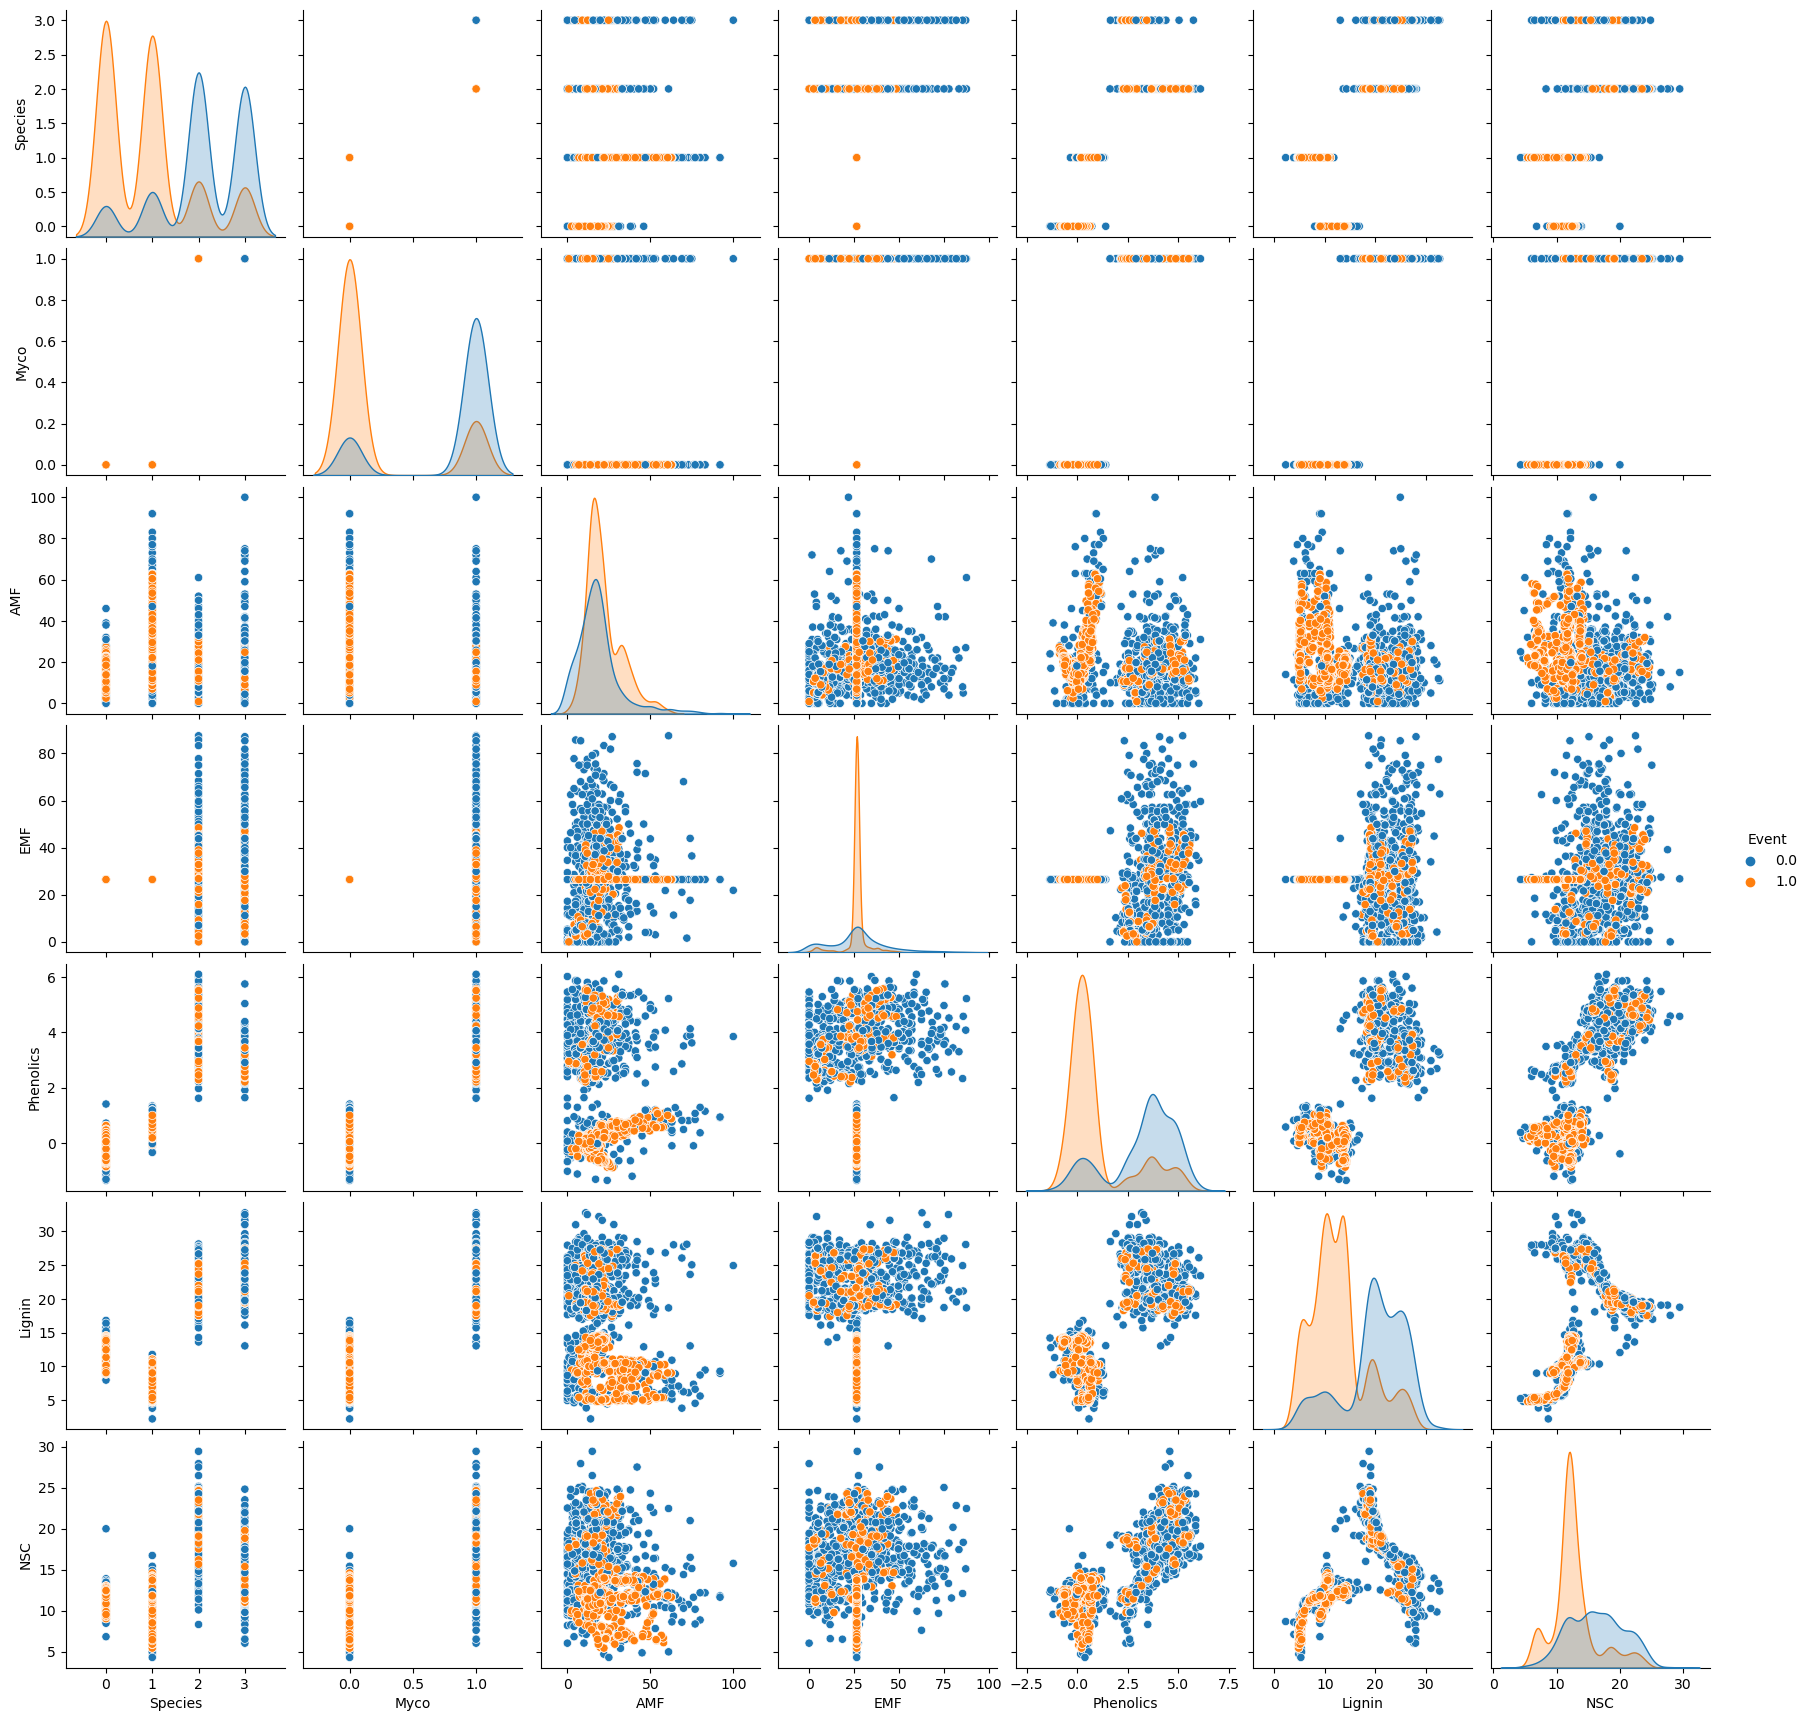

In [47]:
sns.pairplot(reduced_data, hue='Event', diag_kind='kde');


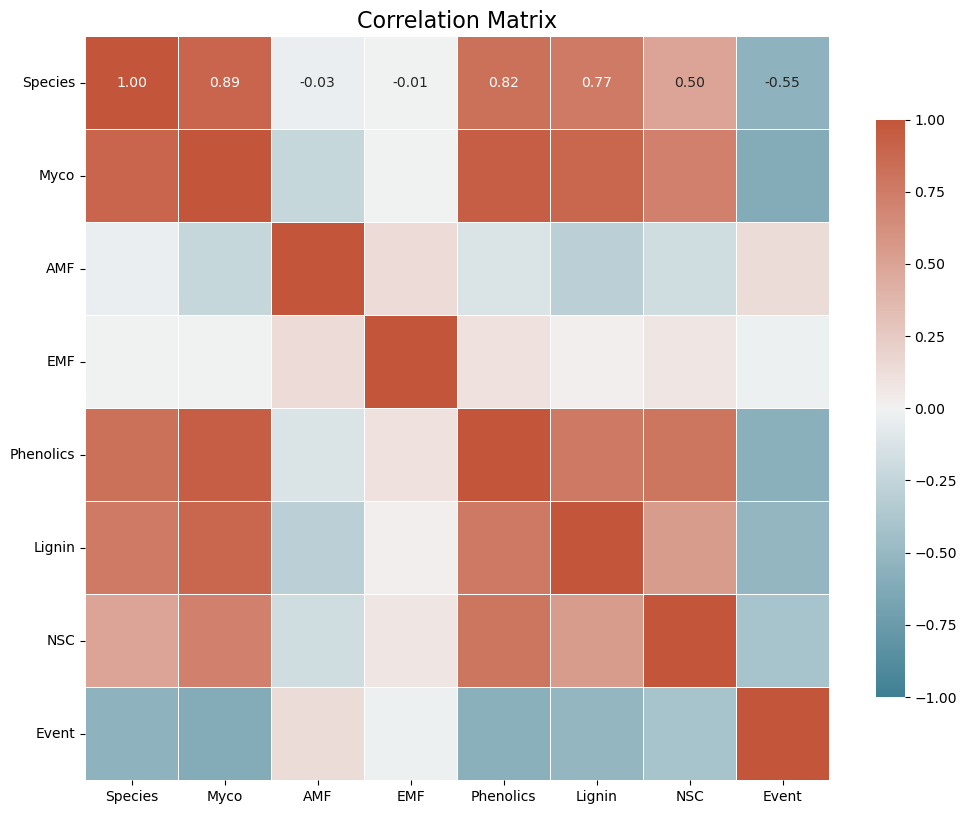

In [48]:
correlation_matrix = reduced_data.corr()

# Set up a diverging color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a larger figure
plt.figure(figsize=(12, 10))

# Plot the enhanced heatmap with actual feature names
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75}, xticklabels=reduced_data.columns, yticklabels=reduced_data.columns, annot_kws={"size": 10})

# Add a title
plt.title('Correlation Matrix', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


### Model Prep and Creation

In [49]:
y = df_reduced['Event']
X = df_reduced.drop('Event', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [50]:
lr = LogisticRegression(penalty=None)
lr.fit(X_train, y_train); 
y_predict_lr = lr.predict(X_test)
y_lr_pred_prob = lr.predict_proba(X_test)


print('The accuracy for the train ' + str(lr.score(X_train, y_train) * 100) + '%')
print('--------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_lr))
print('True Positves: ', confusion_matrix(y_test, y_predict_lr)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_predict_lr)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_predict_lr)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_predict_lr)[1][1])

The accuracy for the train 79.73033707865169%
--------------------------------
Confusion Matrix
[[200  34]
 [ 64 259]]
True Positves:  200
False Positives:  34
False Negatives:  64
True Negatives:  259


In [51]:
# Accuracy, Precision, Recall, F1 score

df_logR = pd.DataFrame(classification_report(y_predict_lr,y_test, digits=2,output_dict=True)).T

df_logR['support'] = df_logR.support.apply(int)

df_logR.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

confusion_LR=confusion_matrix(y_test, y_predict_lr)
TP = confusion_LR[1, 1]
TN = confusion_LR[0, 0]
FP = confusion_LR[0, 1]
FN = confusion_LR[1, 0]

specificity_lr = TN / (TN + FP)
print('The Specificity Score is ' + str(specificity_lr))

The Specificity Score is 0.8547008547008547


In [52]:
df_logR = pd.DataFrame(classification_report(y_predict_lr,y_test, digits=2,output_dict=True)).T

df_logR['support'] = df_logR.support.apply(int)

df_logR.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

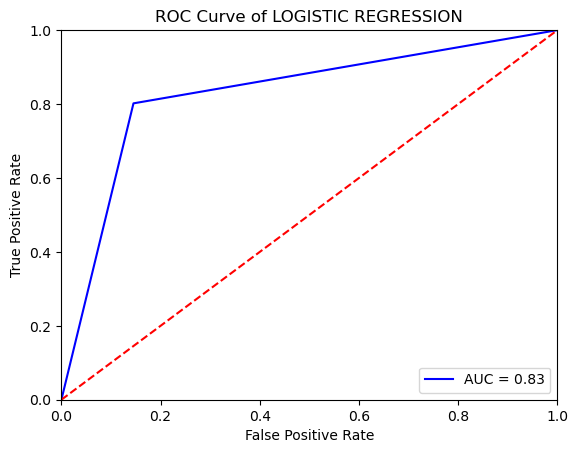

In [53]:
# ROC Curve of Logistic Regression

Y_scores = lr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_lr)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()

#### Random Forest

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train); 
y_predict_rf = rf.predict(X_test)
y_rf_pred_prob = rf.predict_proba(X_test)


print('The accuracy for the train ' + str(rf.score(X_train, y_train) * 100) + '%')
print('--------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_lr))
print('True Positves: ', confusion_matrix(y_test, y_predict_rf)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_predict_rf)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_predict_rf)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_predict_rf)[1][1])

The accuracy for the train 95.50561797752809%
--------------------------------
Confusion Matrix
[[200  34]
 [ 64 259]]
True Positves:  192
False Positives:  42
False Negatives:  42
True Negatives:  281


In [55]:
# Accuracy, Precision, Recall, F1 score

df_RF = pd.DataFrame(classification_report(y_predict_rf,y_test, digits=2,output_dict=True)).T

df_RF['support'] = df_RF.support.apply(int)

df_RF.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

confusion_RF=confusion_matrix(y_test, y_predict_rf)
TP = confusion_RF[1, 1]
TN = confusion_RF[0, 0]
FP = confusion_RF[0, 1]
FN = confusion_RF[1, 0]

specificity_rf = TN / (TN + FP)
print('The Specificity Score is ' + str(specificity_rf))

The Specificity Score is 0.8205128205128205


In [56]:
df_RF = pd.DataFrame(classification_report(y_predict_rf,y_test, digits=2,output_dict=True)).T

df_RF['support'] = df_RF.support.apply(int)

df_RF.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

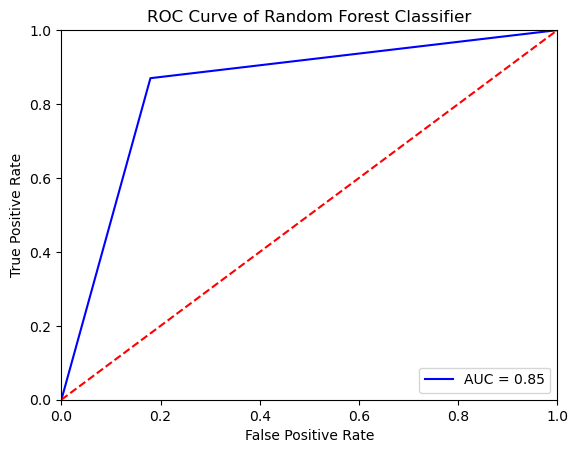

In [57]:
# ROC Curve of Random Forest Classifier

Y_scores = rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_rf)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier')
plt.show()

#### Support Vector Machine

In [58]:
sv = SVC(probability=True)
sv.fit(X_train, y_train); 
y_predict_sv = sv.predict(X_test)
y_sv_pred_prob = sv.predict_proba(X_test)


print('The accuracy for the train ' + str(sv.score(X_train, y_train) * 100) + '%')
print('--------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_sv))
print('True Positves: ', confusion_matrix(y_test, y_predict_sv)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_predict_sv)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_predict_sv)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_predict_sv)[1][1])

The accuracy for the train 81.88764044943821%
--------------------------------
Confusion Matrix
[[209  25]
 [ 65 258]]
True Positves:  209
False Positives:  25
False Negatives:  65
True Negatives:  258


In [59]:
# Accuracy, Precision, Recall, F1 score

df_SV = pd.DataFrame(classification_report(y_predict_sv,y_test, digits=2,output_dict=True)).T

df_SV['support'] = df_SV.support.apply(int)

df_SV.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

confusion_SV=confusion_matrix(y_test, y_predict_sv)
TP = confusion_SV[1, 1]
TN = confusion_SV[0, 0]
FP = confusion_SV[0, 1]
FN = confusion_SV[1, 0]

specificity_sv = TN / (TN + FP)
print('The Specificity Score is ' + str(specificity_sv))

The Specificity Score is 0.8931623931623932


In [60]:
df_SV = pd.DataFrame(classification_report(y_predict_sv,y_test, digits=2,output_dict=True)).T

df_SV['support'] = df_SV.support.apply(int)

df_SV.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

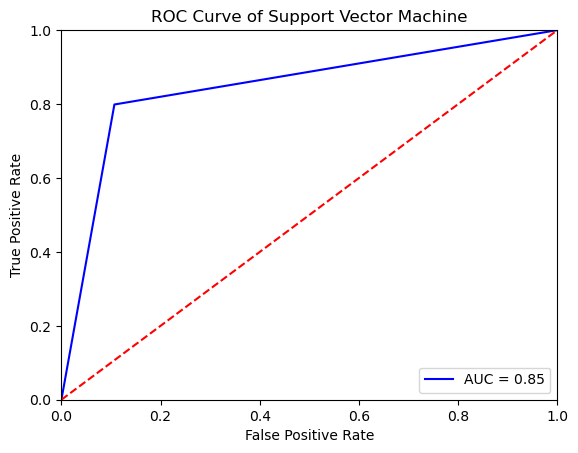

In [61]:
# ROC Curve of Support Vector Machine

Y_scores = sv.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_sv)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Support Vector Machine')
plt.show()

# Sterility Prediction

In [65]:
df.isnull().any()

No             False
Plot           False
Subplot        False
Species        False
Light_ISF      False
Light_Cat      False
Core           False
Soil           False
Adult          False
Sterile        False
Conspecific    False
Myco           False
SoilMyco       False
PlantDate      False
AMF            False
EMF             True
Phenolics      False
Lignin         False
NSC            False
Census         False
Time           False
Event          False
Harvest         True
Alive           True
t0             False
t1             False
dtype: bool

In [67]:
df.drop(['t0', 't1'], axis=1)

No  Plot Subplot          Species  Light_ISF Light_Cat  Core  \
0      126     1       C   Acer saccharum      0.106       Med  2017   
1       11     1       C     Quercus alba      0.106       Med  2017   
2       12     1       C    Quercus rubra      0.106       Med  2017   
3     2823     7       D   Acer saccharum      0.080       Med  2016   
4     5679    14       A   Acer saccharum      0.060       Low  2017   
...    ...   ...     ...              ...        ...       ...   ...   
2777  7086    17       C     Quercus alba      0.122      High  2017   
2778  7165    17       B  Prunus serotina      0.111       Med  2017   
2779  7217    17       D     Quercus alba      0.118       Med  2017   
2780  7306    17       D     Quercus alba      0.118       Med  2017   
2782  7401    18       A  Prunus serotina      0.141      High  2016   

                       Soil Adult      Sterile  ...    AMF    EMF Phenolics  \
0           Prunus serotina     I  Non-Sterile  ...  22.00    NaN     -0.56   
1             Quercus rubra   970  Non-Sterile  ...  15.82  31.07      5.19   
2           Prunus serotina     J  Non-Sterile  ...  24.45  28.19      3.36   
3           Prunus serotina     J  Non-Sterile  ...  22.23    NaN     -0.71   
4           Prunus serotina   689  Non-Sterile  ...  21.15    NaN     -0.58   
...                     ...   ...          ...  ...    ...    ...       ...   
2777          Quercus rubra  1595  Non-Sterile  ...  10.89  39.00      5.53   
2778  Populus grandidentata   891  Non-Sterile  ...  40.89    NaN      0.83   
2779            Acer rubrum  1468  Non-Sterile  ...  15.47  32.82      4.88   
2780          Quercus rubra  1454  Non-Sterile  ...  11.96  37.67      5.51   
2782  Populus grandidentata   118  Non-Sterile  ...  60.46    NaN      1.00   

     Lignin    NSC  Census   Time  Event  Harvest  Alive  
0     13.86  12.15       4   14.0    1.0      NaN    NaN  
1     20.52  19.29      33  115.5    0.0      NaN      X  
2     24.74  15.01      18   63.0    1.0      NaN    NaN  
3     14.29  12.36       4   14.0    1.0      NaN    NaN  
4     10.85  11.20       4   14.0    1.0      NaN    NaN  
...     ...    ...     ...    ...    ...      ...    ...  
2777  21.44  18.99      16   56.0    1.0      NaN    NaN  
2778   9.15  11.88      16   56.0    1.0      NaN    NaN  
2779  19.01  23.50      16   56.0    1.0      NaN    NaN  
2780  21.13  19.10      16   56.0    1.0      NaN    NaN  
2782   9.04  11.82      16   56.0    1.0      NaN    NaN  

[2782 rows x 24 columns]

### Data Cleaning

In [68]:
df.dropna(subset=['Event'], inplace=True)
df = df.drop(['Time','PlantDate', 'Harvest', 'Alive'], axis=1)
df['EMF'].fillna(df['EMF'].mean(), inplace=True)

In [69]:
df.isnull().sum()


No             0
Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Census         0
Event          0
t0             0
t1             0
dtype: int64

### Feature Engineering

In [70]:
lst=["Species","Light_Cat","Soil","Sterile","Conspecific","Myco","SoilMyco", "Subplot"]
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])
    
df['Adult'] = df['Adult'].astype(str)
df['Adult'] = le.fit_transform(df['Adult'])
df.head()

No  Plot  Subplot  Species  Light_ISF  Light_Cat  Core  Soil  Adult  \
0   126     1        2        0      0.106          2  2017     3     34   
1    11     1        2        2      0.106          2  2017     5     30   
2    12     1        2        3      0.106          2  2017     3     35   
3  2823     7        3        0      0.080          2  2016     3     35   
4  5679    14        0        0      0.060          1  2017     3     26   

   Sterile  ...  SoilMyco    AMF        EMF  Phenolics  Lignin    NSC  Census  \
0        0  ...         0  22.00  26.479844      -0.56   13.86  12.15       4   
1        0  ...         1  15.82  31.070000       5.19   20.52  19.29      33   
2        0  ...         0  24.45  28.190000       3.36   24.74  15.01      18   
3        0  ...         0  22.23  26.479844      -0.71   14.29  12.36       4   
4        0  ...         0  21.15  26.479844      -0.58   10.85  11.20       4   

   Event         t0         t1  
0    1.0 -60.128773   2.057367  
1    0.0  54.428436   1.359259  
2    1.0  19.482752  35.274189  
3    1.0 -60.133038   2.062281  
4    1.0 -60.154202   1.972397  

[5 rows x 22 columns]

### Feature Selection

In [71]:
X=df.drop(['Sterile'],axis=1)
y=df['Sterile']

In [75]:
params = {
    "max_depth": range(1, 9),
    "min_samples_split": [5, 7, 9, 12, 15],
    "min_samples_leaf": [5, 7, 9, 10, 12]
}

s_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

estimator = RandomForestClassifier(random_state=42)
scoring = make_scorer(f1_score)

grid_search = GridSearchCV(
    estimator=estimator, 
    param_grid=params, 
    scoring=scoring, 
    cv=s_kfold, 
    n_jobs=-1
)

search_results = grid_search.fit(X, y)

best_params = search_results.best_params_
best_score = search_results.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best score: 1.0


In [76]:
fi = pd.Series(search_results.best_estimator_.feature_importances_, index = X.columns)
fi

No             0.000253
Plot           0.000137
Subplot        0.000000
Species        0.002337
Light_ISF      0.000115
Light_Cat      0.000000
Core           0.004709
Soil           0.299766
Adult          0.002240
Conspecific    0.192877
Myco           0.000000
SoilMyco       0.205693
AMF            0.112211
EMF            0.096171
Phenolics      0.031422
Lignin         0.011327
NSC            0.013763
Census         0.003592
Event          0.011081
t0             0.012072
t1             0.000233
dtype: float64

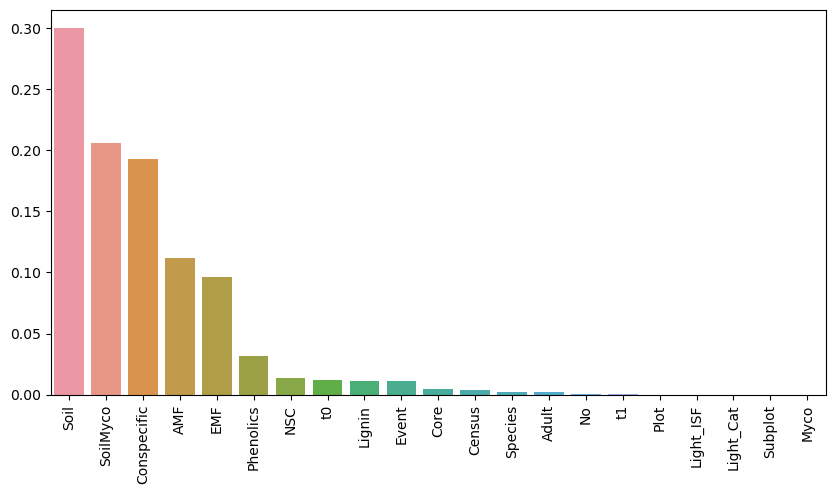

In [77]:
plt.figure(figsize=(10,5))

# Sort the feature importance values in descending order
sorted_fi = fi.sort_values(ascending=False)

# Create a bar plot
ax = sns.barplot(x=sorted_fi.index, y=sorted_fi)

# Rotate x-axis labels for better readability
ax.tick_params(rotation=90, axis='x')

# Show the plot
plt.show()

In [78]:
important_features = fi[fi >= 0.04 ].index.to_list()
important_features

['Soil', 'Conspecific', 'SoilMyco', 'AMF', 'EMF']

In [81]:
reduced_data = df.loc[:,['Soil',
 'Conspecific',
 'SoilMyco',
 'AMF',
 'EMF',
 'Sterile']]
df_reduced = reduced_data.copy()
df_reduced.head(20)

Soil  Conspecific  SoilMyco    AMF        EMF  Sterile
0      3            1         0  22.00  26.479844        0
1      5            1         1  15.82  31.070000        0
2      3            1         0  24.45  28.190000        0
3      3            1         0  22.23  26.479844        0
4      3            1         0  21.15  26.479844        0
5      0            1         0  35.29  26.479844        0
6      2            1         1  24.00  20.000000        0
7      6            2         2   4.00   0.000000        1
8      1            1         0  28.74  36.180000        0
9      2            1         1  14.16  26.479844        0
10     3            1         0  24.45  28.190000        0
11     1            1         0  19.68  21.580000        0
12     4            0         1  11.14  32.750000        0
13     0            1         0  11.45  21.840000        0
14     6            2         2  24.00   9.090000        1
15     5            1         1  17.54  32.820000        0
16     6            2         2   3.00   0.000000        1
17     5            0         1  41.00  13.330000        0
18     2            1         1  10.00  26.479844        0
19     1            0         0  22.98  26.479844        0

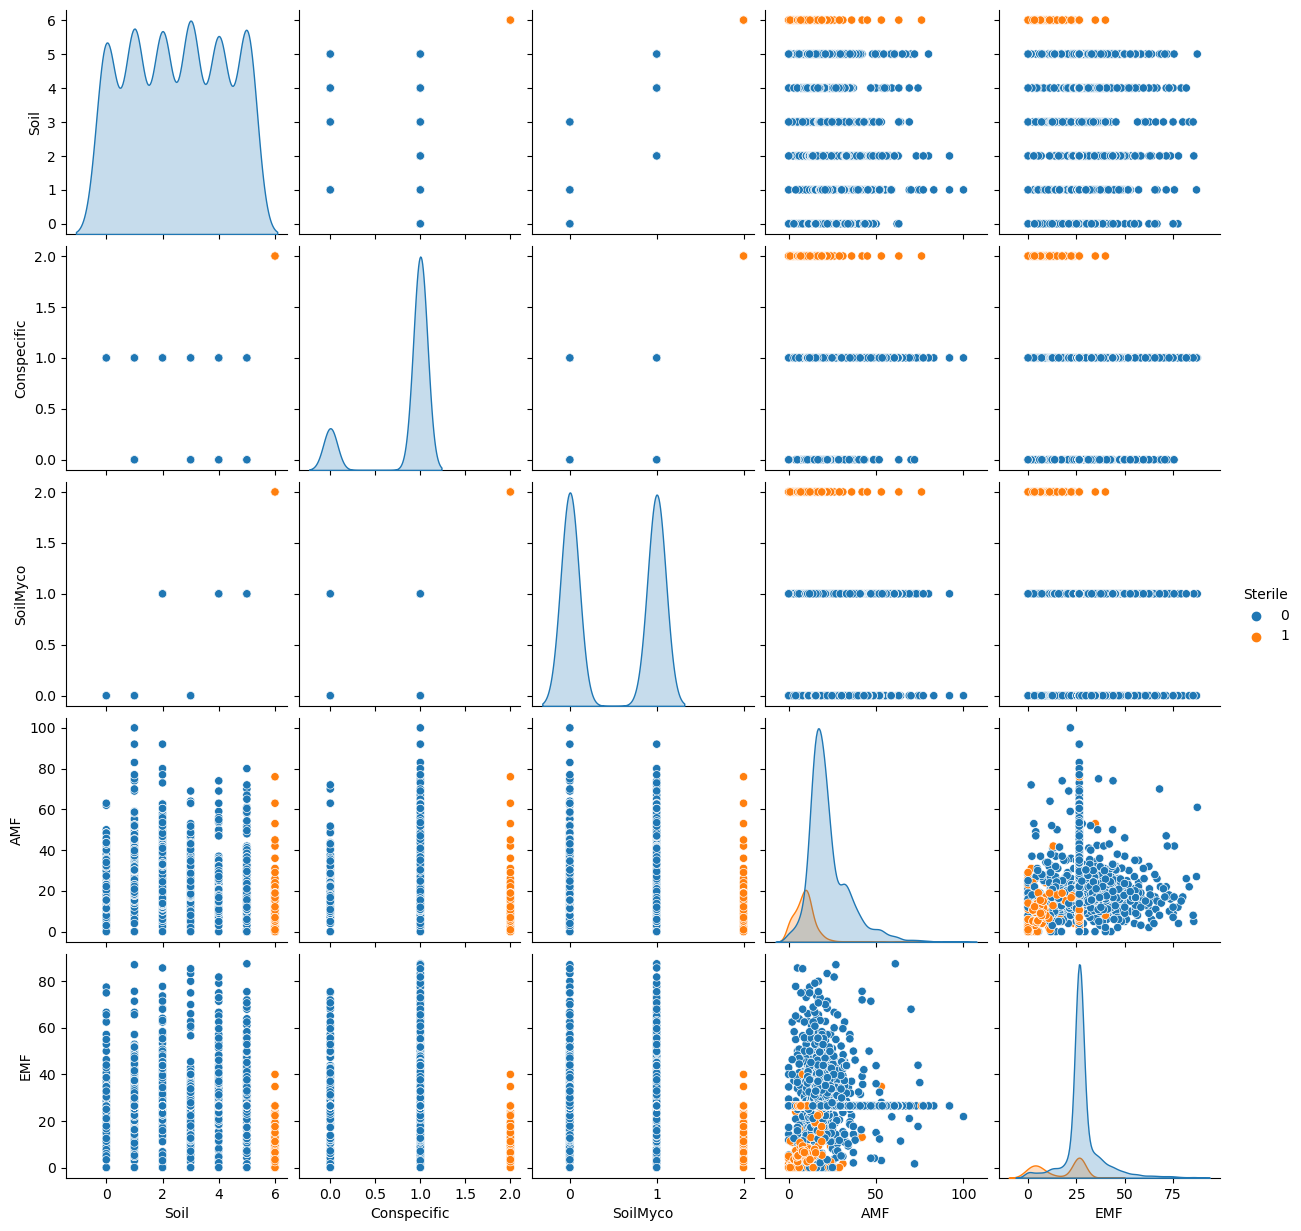

In [82]:
sns.pairplot(reduced_data, hue='Sterile', diag_kind='kde');


In [83]:
y = df_reduced['Sterile']
X = df_reduced.drop('Sterile', axis=1)

In [88]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

sm=RandomOverSampler()
X,y=sm.fit_resample(X,y)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=4)


#### KNN

In [90]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
df_knn = pd.DataFrame(classification_report(y_pred1, y_test, digits=2, output_dict=True)).T
df_knn['support'] = df_knn.support.apply(int)
df_knn.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

In [91]:
print(confusion_matrix(y_test, y_pred1))
print('True Positves: ', confusion_matrix(y_test, y_pred1)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_pred1)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_pred1)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_pred1)[1][1])

[[221   7]
 [  0 244]]
True Positves:  221
False Positives:  7
False Negatives:  0
True Negatives:  244


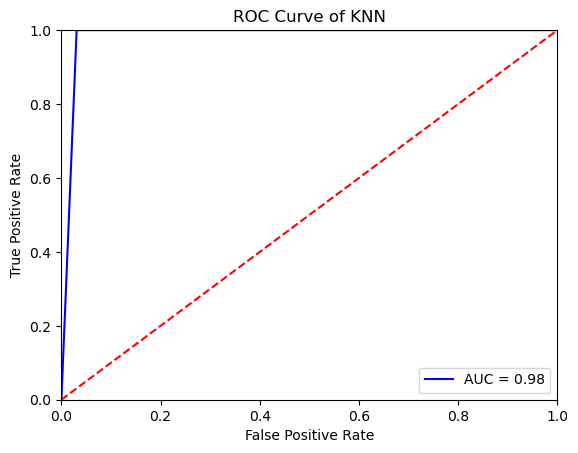

In [92]:
# ROC Curve of Logistic Regression

Y_scores = knn1.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

## Results

For predicting tree survival, the performance of the three classification models was evaluated using accuracy, specificity, recall, and area under the ROC curve (AUC). On the test set, random forest achieved the highest accuracy at 85%, compared to 82% for logistic regression and 83% for support vector machine (SVM). However, SVM had the best recall score at 0.91, indicating it correctly identified 91% of the trees that died. Its specificity of 0.89 was also competitive, meaning it correctly predicted 89% of the survived trees. Logistic regression attained a more balanced specificity of 0.85.


In terms of AUC, the three methods achieved similar results between 0.83 to 0.85. Though small, the random forest presents a slight edge. Taken together, while all methods display respectable predictive capabilities on this problem, random forest produces a superior balance of performance metrics. Its accuracy, recall, and AUC scores marginally outperform the alternatives, likely owed to its inherent ability to model complex interactions between variables influencing tree mortality.


For predicting soil sterility, a K-nearest neighbors model was constructed. On the test set, it achieved near perfect scores across all metrics - accuracy of 96%, 100% precision and recall, and AUC of 0.97. The extremely high precision indicates no false positives, so all sterility predictions were correct. Meanwhile, 100% recall means it successfully identified all sterile cases. The combination demonstrates exceptionally reliable sterile soil detection abilities from the model.


## Conclusion

The machine learning framework developed in this study demonstrates robust performance in classifying both tree survival status and soil nutrient profiles. The random forest algorithm emerges as the premier technique for modeling mortality likelihood, leveraging its ensemble structure to capture complex ecological interactions mirrored in the data. Meanwhile, the KNN classifier excels at predicting soil sterility with exceptional accuracy and reliability.

These findings carry meaningful management implications. By diagnosing the most influential drivers of tree death risks and soil quality loss, results guide interventions targeting the salient environmental stressors and vital rates impacting forest resilience. Monitoring priorities and experimental manipulations should focus on embellishing resource access, pest resistance, and mycorrhizal associations to bolster recruitment potential amid climate change.
